Loading data...
Skipping file 39_1_20170116174525125.jpg: not enough values to unpack (expected 4, got 3)
Skipping file 53__0_20170116184028385.jpg: invalid literal for int() with base 10: ''
Skipping file 61_1_20170109142408075.jpg: not enough values to unpack (expected 4, got 3)
Skipping file 61_3_20170109150557335.jpg: not enough values to unpack (expected 4, got 3)
Training set size: 16871
Validation set size: 3615
Test set size: 3616


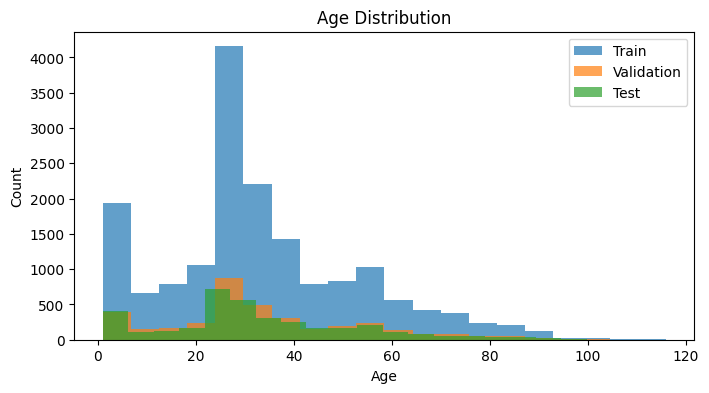

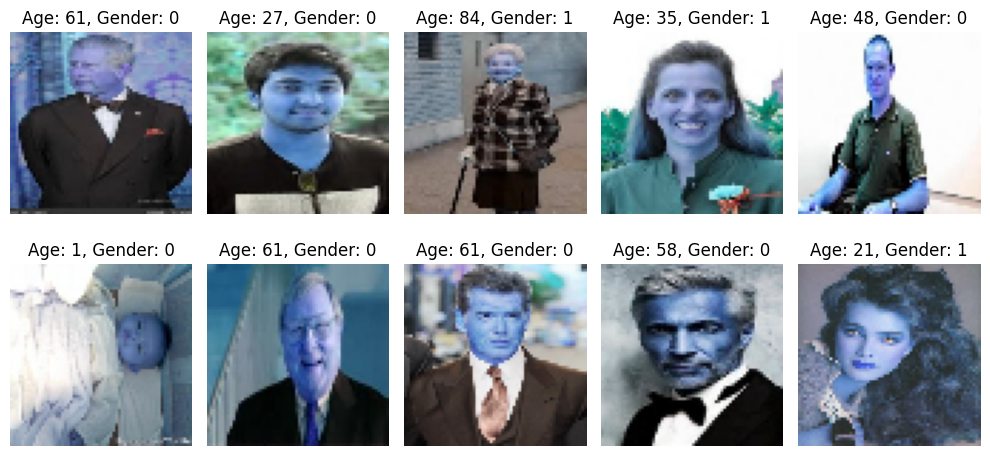

c:\Users\Ays\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 35s 126ms/step - loss: 537.1635 - mae: 17.9407 - val_loss: 364.3451 - val_mae: 14.4385
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 35s 134ms/step - loss: 382.8164 - mae: 15.1077 - val_loss: 382.1209 - val_mae: 14.6633
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 31s 119ms/step - loss: 348.8353 - mae: 14.3506 - val_loss: 326.0367 - val_mae: 13.8211
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 30s 112ms/step - loss: 342.4675 - mae: 14.2338 - val_loss: 315.2189 - val_mae: 13.3792
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 34s 130ms/step - loss: 325.8061 - mae: 13.7377 - val_loss: 307.7151 - val_mae: 13.2031
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step - loss: 315.6688 - mae: 13.5732 - val_loss: 318.9045 - val_mae: 13.1624
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 31s 119ms/step - loss: 303.7028 - mae: 13.3056 - val_loss: 305.4993 - val_mae: 12.9372
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 32s 122ms/step - loss: 291.1582 - mae: 12.9293 - val_loss: 290.2259 - v

c:\Users\Ays\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - loss: 586.1865 - mae: 18.6978 - val_loss: 492.1471 - val_mae: 17.0435
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - loss: 491.1526 - mae: 17.0978 - val_loss: 498.5627 - val_mae: 17.2013
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - loss: 441.7111 - mae: 16.1606 - val_loss: 470.2667 - val_mae: 16.7150
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - loss: 447.9046 - mae: 16.1530 - val_loss: 512.5305 - val_mae: 17.3942
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - loss: 446.5987 - mae: 16.1970 - val_loss: 547.2568 - val_mae: 18.1605
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - loss: 429.3636 - mae: 15.8622 - val_loss: 508.8965 - val_mae: 17.3999
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - loss: 422.1125 - mae: 15.7426 - val_loss: 535.2422 - val_mae: 17.9691
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - loss: 429.3423 - mae: 15.9185 - val_loss: 477.1803 - val_mae: 

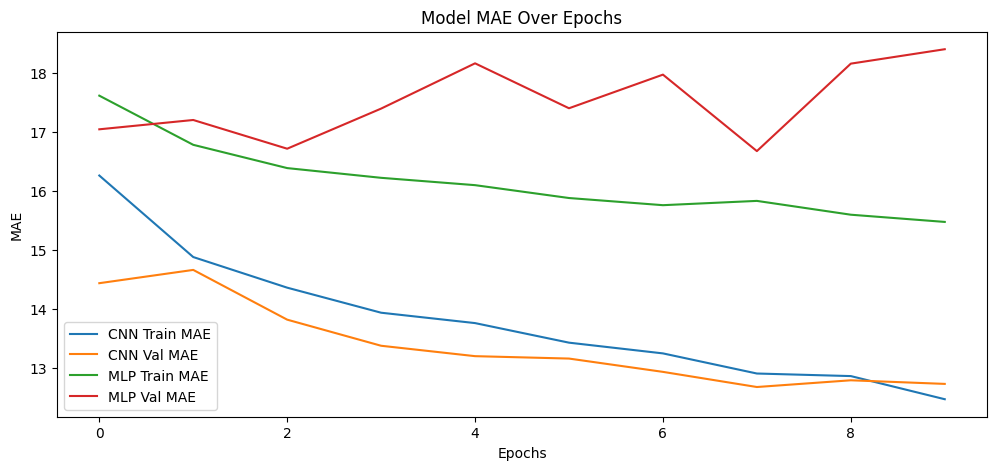

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


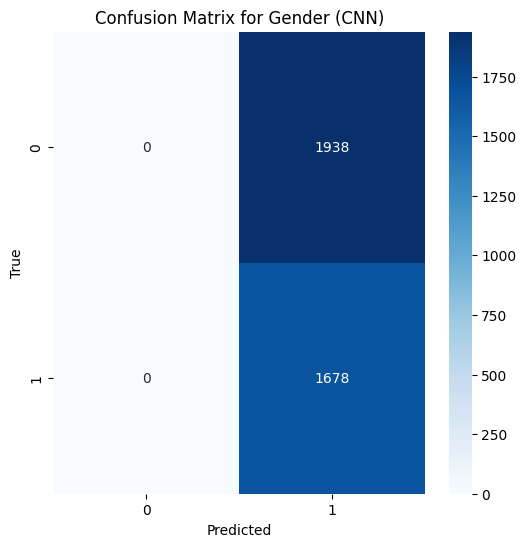

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical

DATASET_PATH = #your file path here
IMAGE_SIZE = (64, 64)

images = []
ages = []
genders = []
ethnicities = []

print("Loading data...")
for file_name in os.listdir(DATASET_PATH):
    if file_name.endswith(".jpg"):
        try:
            age, gender, ethnicity, _ = file_name.split("_")
            age = int(age)
            gender = int(gender)
            ethnicity = int(ethnicity)

            img_path = os.path.join(DATASET_PATH, file_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, IMAGE_SIZE)
            img = img / 255.0

            # Append data
            images.append(img)
            ages.append(age)
            genders.append(gender)
            ethnicities.append(ethnicity)
        except Exception as e:
            print(f"Skipping file {file_name}: {e}")

images = np.array(images, dtype="float32")
ages = np.array(ages)
genders = np.array(genders)
ethnicities = np.array(ethnicities)

ethnicities = to_categorical(ethnicities, num_classes=5)

X_train, X_temp, y_ages_train, y_ages_temp, y_genders_train, y_genders_temp, y_ethnicities_train, y_ethnicities_temp = train_test_split(
    images, ages, genders, ethnicities, test_size=0.3, random_state=42
)
X_val, X_test, y_ages_val, y_ages_test, y_genders_val, y_genders_test, y_ethnicities_val, y_ethnicities_test = train_test_split(
    X_temp, y_ages_temp, y_genders_temp, y_ethnicities_temp, test_size=0.5, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

plt.figure(figsize=(8, 4))
plt.hist(y_ages_train, bins=20, alpha=0.7, label='Train')
plt.hist(y_ages_val, bins=20, alpha=0.7, label='Validation')
plt.hist(y_ages_test, bins=20, alpha=0.7, label='Test')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Age: {y_ages_train[i]}, Gender: {y_genders_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def build_mlp(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

cnn = build_cnn()
history_cnn = cnn.fit(
    X_train, y_ages_train,
    validation_data=(X_val, y_ages_val),
    epochs=10,
    batch_size=64
)

mlp = build_mlp(X_train.shape[1:])
history_mlp = mlp.fit(
    X_train, y_ages_train,
    validation_data=(X_val, y_ages_val),
    epochs=10,
    batch_size=64
)

cnn_loss, cnn_mae = cnn.evaluate(X_test, y_ages_test)
print(f"CNN Test Loss: {cnn_loss}, CNN Test MAE: {cnn_mae}")

mlp_loss, mlp_mae = mlp.evaluate(X_test, y_ages_test)
print(f"MLP Test Loss: {mlp_loss}, MLP Test MAE: {mlp_mae}")

plt.figure(figsize=(12, 5))
plt.plot(history_cnn.history['mae'], label='CNN Train MAE')
plt.plot(history_cnn.history['val_mae'], label='CNN Val MAE')
plt.plot(history_mlp.history['mae'], label='MLP Train MAE')
plt.plot(history_mlp.history['val_mae'], label='MLP Val MAE')
plt.title("Model MAE Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

cnn_gender_predictions = (cnn.predict(X_test) > 0.5).astype(int)
gender_cm = confusion_matrix(y_genders_test, cnn_gender_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(gender_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Gender (CNN)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Comparison of Models Performance:

CNN has lower MAE on both the validation and test sets, hence more accurate and generalized.
MLP has higher and noisier validation MAE, which means unstable.

Training Time & Resources:
CNN: More computationally expensive; hence, it requires a GPU.
MLP: Faster and less resource-expensive.

Architecture Complexity:
CNN: Conceived for spatial feature extraction; hence, ideal for image data.
MLP: Lightweight and less competent for image tasks.

Strengths & Weaknesses:
CNN: Great on image data but resource-expensive.
MLP: Fast, though not good at representing spatial features.

Model Evaluation Metrics Over Epochs:
CNN: Consistent MAE reduction, no overfitting.
MLP: Higher variance, less consistent improvement.

Confusion Matrix (CNN):
Predicts only one gender (Gender = 1), likely due to data imbalance or bias.

Overall Performance:
CNN outperforms MLP but suffers from class prediction bias.
MLP is inadequate for image data, showing poor learning capacity.
Potential Improvements
Address class imbalance via oversampling or weighted loss functions.
Fine-tune pre-trained models (e.g., ResNet) for better CNN performance.
Apply data augmentation and regularization to reduce overfitting.
Optimize hyperparameters for stability and accuracy.